In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
movies_header = 'MovieID::Title::Genres'.split('::')
ratings_header = 'UserID::MovieID::Rating::Timestamp'.split('::')
users_header = 'UserID::Gender::Age::Occupation::Zip-code'.split('::')

In [4]:
movies = pd.read_csv('movies.dat', sep = '::', names = movies_header)
ratings = pd.read_csv('ratings.dat', sep = '::', names = ratings_header, parse_dates = ['Timestamp'])
users = pd.read_csv('users.dat', sep = '::', names = users_header)

C:\Users\sudha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
C:\Users\sudha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\sudha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from th

In [5]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [8]:
movie_ratings = pd.merge(movies,ratings, on = 'MovieID')

In [9]:
movie_ratings.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [10]:
master_data = pd.merge(movie_ratings, users, on = 'UserID')

In [11]:
master_data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [12]:
master_data.shape

(1000209, 10)

In [13]:
master_data.isnull().sum()

MovieID       0
Title         0
Genres        0
UserID        0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

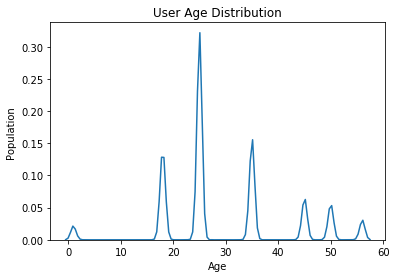

<Figure size 432x288 with 0 Axes>

In [14]:
sns.distplot(master_data['Age'], hist= False)
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Population ')
plt.show()
plt.savefig('Age.png')

In [15]:
md = master_data.groupby(by = 'MovieID')

In [16]:
toy_story = md.get_group(1)

In [17]:
toy_story.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
369,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370


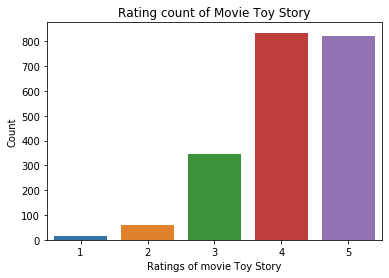

<Figure size 432x288 with 0 Axes>

In [18]:
sns.countplot(x='Rating', data=toy_story)
plt.title('Rating count of Movie Toy Story')
plt.xlabel('Ratings of movie Toy Story')
plt.ylabel('Count')
plt.show()
plt.savefig('toy.png')

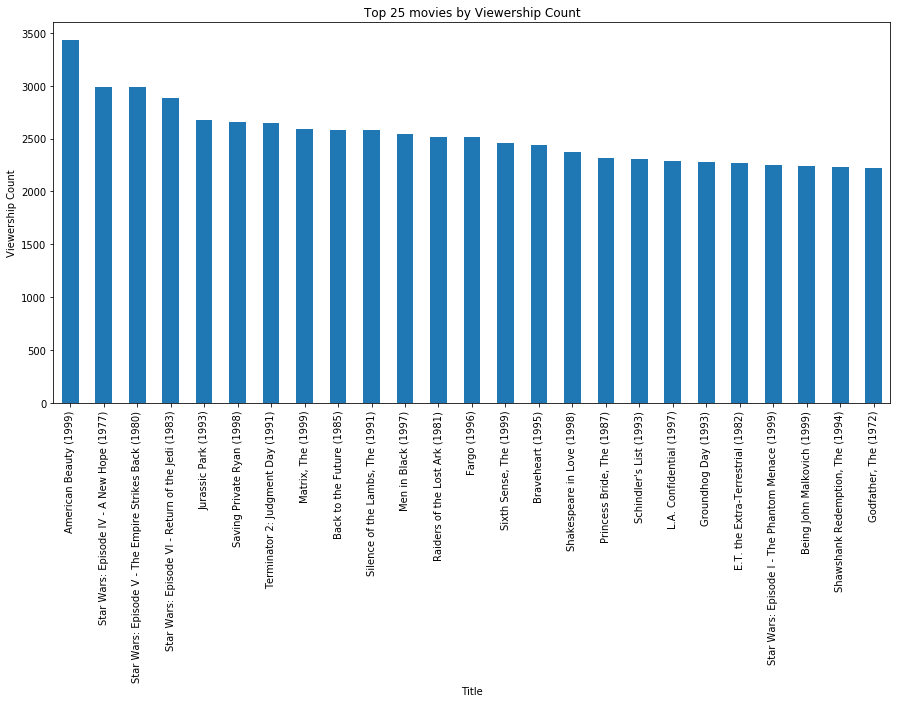

In [19]:
plt.figure(figsize=(15,7))
top = master_data.groupby("Title").size().sort_values(ascending=False)[:25]
plt.title('Top 25 movies by Viewership Count')
plt.ylabel("Viewership Count")
plt.xlabel("Title")
top.plot(kind="bar")
plt.savefig('Viewership.png')

In [20]:
user2696 = master_data.groupby(by='UserID').get_group(2696)

In [21]:
user2696

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


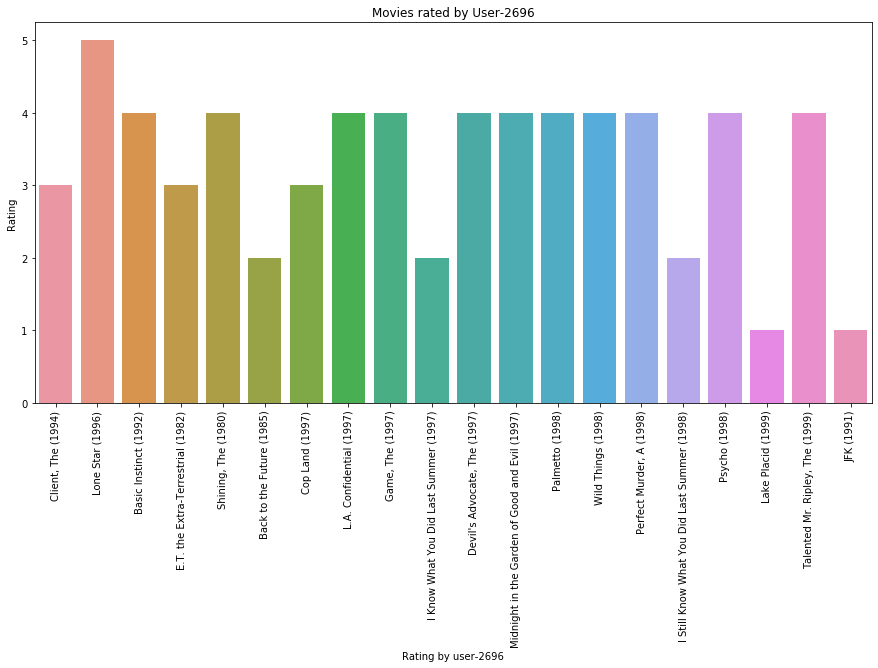

In [22]:
plt.figure(figsize=[15,7])
plt.title('Movies rated by User-2696')
sns.barplot(x='Title', y='Rating', data = user2696)
plt.xlabel('Rating by user-2696')
plt.xticks(rotation = 'vertical')
plt.savefig('2696.png')

In [23]:
user2696['Title'].values

array(['Client, The (1994)', 'Lone Star (1996)', 'Basic Instinct (1992)',
       'E.T. the Extra-Terrestrial (1982)', 'Shining, The (1980)',
       'Back to the Future (1985)', 'Cop Land (1997)',
       'L.A. Confidential (1997)', 'Game, The (1997)',
       'I Know What You Did Last Summer (1997)',
       "Devil's Advocate, The (1997)",
       'Midnight in the Garden of Good and Evil (1997)',
       'Palmetto (1998)', 'Wild Things (1998)',
       'Perfect Murder, A (1998)',
       'I Still Know What You Did Last Summer (1998)', 'Psycho (1998)',
       'Lake Placid (1999)', 'Talented Mr. Ripley, The (1999)',
       'JFK (1991)'], dtype=object)

In [24]:
master_data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [25]:
genres = []
for i in master_data['Genres']:
    genres.extend(i.split('|'))

In [26]:
master_data['Male'] = pd.get_dummies(master_data['Gender'], drop_first=True)

In [27]:
unique_genres = list(set(genres))

In [28]:
for i in unique_genres:
    master_data[i] = master_data['Genres'].str.contains(i)*1

In [29]:
x = master_data.drop(['MovieID','Genres','Title','Rating','Timestamp','Gender','Zip-code','UserID','Occupation'],axis=1)

In [30]:
y = master_data['Rating']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.1, random_state=10)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr = LogisticRegression()

In [35]:
lr.fit(X_train,Y_train)

C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
lr.score(X_test,Y_test)

0.34727707181491885

In [37]:
pred = lr.predict(X_test)

In [38]:
pred[:50]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 5,
       5, 4, 4, 4, 4, 4], dtype=int64)